## Project I: Analyzing the Evolution of Top 5 European League Midfielders over the Last 5 Years

### Summary
Gone are the days of defined roles within the midfield. There are few pure #10s or registas who are notable for a strictly specialized skillset nowadays. Instead, the players in the middle of the field are tasked each for similar types of duties - and I wish to define what it means to be a modern midfielder and in what forms they take shape. 

### Approach
Data will be scraped from Football Reference (fbref) and cleaned as required. Following this, a core set of statistics will be selected using a partial Principal Feature Analysis (PFA) approach; From there, the data will be loaded into a 5-means clustering unsupervised learning algorithm to determine 5 specific 'types' of midfielders

### Output
The resulting data analysis conducted in this notebook will be adjoined with some visualization work on Tableau to provide a further, in-depth investigation of the defined groups from the K-means algorithm to provide some further context and football-based understanding to what the data is telling us.

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='whitegrid', palette='pastel')

import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import sys, getopt
import csv

import warnings
warnings.filterwarnings("ignore")

### Data Loading & Initializing

We first load data from FbRef - only three tables are loaded at a time for otherwise fbref gets suspect of more than 3 requests at once.

In [5]:
stats23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/stats/players/2022-2023-Big-5-European-Leagues-Stats')[0]
shooting23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/shooting/players/2022-2023-Big-5-European-Leagues-Stats')[0]
passing23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/passing/players/2022-2023-Big-5-European-Leagues-Stats')[0]

stats23.columns = stats23.columns.droplevel(0)
shooting23.columns = shooting23.columns.droplevel(0)
passing23.columns = passing23.columns.droplevel(0)


stats23 = stats23.drop(['Born', 'Matches'], axis=1)
shooting23 = shooting23.drop(['Born', 'Matches'], axis=1)
passing23 = passing23.drop(['Born', 'Matches'], axis=1)

In [95]:
passing_types23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/passing_types/players/2022-2023-Big-5-European-Leagues-Stats')[0]
gca23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/gca/players/2022-2023-Big-5-European-Leagues-Stats')[0]
defense23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/defense/players/2022-2023-Big-5-European-Leagues-Stats')[0]

passing_types23.columns = passing_types23.columns.droplevel(0)
gca23.columns = gca23.columns.droplevel(0)
defense23.columns = defense23.columns.droplevel(0)

passing_types23 = passing_types23.drop(['Born', 'Matches'], axis=1)
gca23 = gca23.drop(['Born', 'Matches'], axis=1)
defense23 = defense23.drop(['Born', 'Matches'], axis=1)

In [96]:
possession23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/possession/players/2022-2023-Big-5-European-Leagues-Stats')[0]
playingtime23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/playingtime/players/2022-2023-Big-5-European-Leagues-Stats')[0]
misc23 = pd.read_html('https://fbref.com/en/comps/Big5/2022-2023/misc/players/2022-2023-Big-5-European-Leagues-Stats')[0]

possession23.columns = possession23.columns.droplevel(0)
playingtime23.columns = playingtime23.columns.droplevel(0)
misc23.columns = misc23.columns.droplevel(0)

possession23 = possession23.drop(['Born', 'Matches'], axis=1)
playingtime23 = playingtime23.drop(['Born', 'Matches'], axis=1)
misc23 = misc23.drop(['Born', 'Matches'], axis=1)

Though not necessary, each table is saved to reduce load times while re-booting code (e.g., this is for the times my laptop decided it had enough).

In [14]:
stats23.to_csv('output_tables/stats23.csv', index=False)
shooting23.to_csv('output_tables/shooting23.csv', index=False)
passing23.to_csv('output_tables/passing23.csv', index=False)
passing_types23.to_csv('output_tables/passing_types23.csv', index=False)
gca23.to_csv('output_tables/gca23.csv', index=False)
defense23.to_csv('output_tables/defense23.csv', index=False)
possession23.to_csv('output_tables/possession23.csv', index=False)
playingtime23.to_csv('output_tables/playingtime23.csv', index=False)
misc23.to_csv('output_tables/misc23.csv', index=False)
#saved

In [97]:
stats22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/stats/players/2021-2022-Big-5-European-Leagues-Stats')[0]
shooting22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/shooting/players/2021-2022-Big-5-European-Leagues-Stats')[0]
passing22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/passing/players/2021-2022-Big-5-European-Leagues-Stats')[0]

stats22.columns = stats22.columns.droplevel(0)
shooting22.columns = shooting22.columns.droplevel(0)
passing22.columns = passing22.columns.droplevel(0)


stats22 = stats22.drop(['Born', 'Matches'], axis=1)
shooting22 = shooting22.drop(['Born', 'Matches'], axis=1)
passing22 = passing22.drop(['Born', 'Matches'], axis=1)

In [98]:
passing_types22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/passing_types/players/2021-2022-Big-5-European-Leagues-Stats')[0]
gca22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/gca/players/2021-2022-Big-5-European-Leagues-Stats')[0]
defense22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/defense/players/2021-2022-Big-5-European-Leagues-Stats')[0]

passing_types22.columns = passing_types22.columns.droplevel(0)
gca22.columns = gca22.columns.droplevel(0)
defense22.columns = defense22.columns.droplevel(0)

passing_types22 = passing_types22.drop(['Born', 'Matches'], axis=1)
gca22 = gca22.drop(['Born', 'Matches'], axis=1)
defense22 = defense22.drop(['Born', 'Matches'], axis=1)

In [99]:
possession22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/possession/players/2021-2022-Big-5-European-Leagues-Stats')[0]
playingtime22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/playingtime/players/2021-2022-Big-5-European-Leagues-Stats')[0]
misc22 = pd.read_html('https://fbref.com/en/comps/Big5/2021-2022/misc/players/2021-2022-Big-5-European-Leagues-Stats')[0]

possession22.columns = possession22.columns.droplevel(0)
playingtime22.columns = playingtime22.columns.droplevel(0)
misc22.columns = misc22.columns.droplevel(0)

possession22 = possession22.drop(['Born', 'Matches'], axis=1)
playingtime22 = playingtime22.drop(['Born', 'Matches'], axis=1)
misc22 = misc22.drop(['Born', 'Matches'], axis=1)

In [7]:
stats22.to_csv('output_tables/stats22.csv', index=False)
shooting22.to_csv('output_tables/shooting22.csv', index=False)
passing22.to_csv('output_tables/passing22.csv', index=False)
passing_types22.to_csv('output_tables/passing_types22.csv', index=False)
gca22.to_csv('output_tables/gca22.csv', index=False)
defense22.to_csv('output_tables/defense22.csv', index=False)
possession22.to_csv('output_tables/possession22.csv', index=False)
playingtime22.to_csv('output_tables/playingtime22.csv', index=False)
misc22.to_csv('output_tables/misc22.csv', index=False)
#saved

In [100]:
stats21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/stats/players/2020-2021-Big-5-European-Leagues-Stats')[0]
shooting21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/shooting/players/2020-2021-Big-5-European-Leagues-Stats')[0]
passing21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/passing/players/2020-2021-Big-5-European-Leagues-Stats')[0]

stats21.columns = stats21.columns.droplevel(0)
shooting21.columns = shooting21.columns.droplevel(0)
passing21.columns = passing21.columns.droplevel(0)


stats21 = stats21.drop(['Born', 'Matches'], axis=1)
shooting21 = shooting21.drop(['Born', 'Matches'], axis=1)
passing21 = passing21.drop(['Born', 'Matches'], axis=1)

In [101]:
passing_types21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/passing_types/players/2020-2021-Big-5-European-Leagues-Stats')[0]
gca21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/gca/players/2020-2021-Big-5-European-Leagues-Stats')[0]
defense21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/defense/players/2020-2021-Big-5-European-Leagues-Stats')[0]

passing_types21.columns = passing_types21.columns.droplevel(0)
gca21.columns = gca21.columns.droplevel(0)
defense21.columns = defense21.columns.droplevel(0)

passing_types21 = passing_types21.drop(['Born', 'Matches'], axis=1)
gca21 = gca21.drop(['Born', 'Matches'], axis=1)
defense21 = defense21.drop(['Born', 'Matches'], axis=1)

In [102]:
possession21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/possession/players/2020-2021-Big-5-European-Leagues-Stats')[0]
playingtime21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/playingtime/players/2020-2021-Big-5-European-Leagues-Stats')[0]
misc21 = pd.read_html('https://fbref.com/en/comps/Big5/2020-2021/misc/players/2020-2021-Big-5-European-Leagues-Stats')[0]

possession21.columns = possession21.columns.droplevel(0)
playingtime21.columns = playingtime21.columns.droplevel(0)
misc21.columns = misc21.columns.droplevel(0)

possession21 = possession21.drop(['Born', 'Matches'], axis=1)
playingtime21 = playingtime21.drop(['Born', 'Matches'], axis=1)
misc21 = misc21.drop(['Born', 'Matches'], axis=1)

In [6]:
stats21.to_csv('output_tables/stats21.csv', index=False)
shooting21.to_csv('output_tables/shooting21.csv', index=False)
passing21.to_csv('output_tables/passing21.csv', index=False)
passing_types21.to_csv('output_tables/passing_types21.csv', index=False)
gca21.to_csv('output_tables/gca21.csv', index=False)
defense21.to_csv('output_tables/defense21.csv', index=False)
possession21.to_csv('output_tables/possession21.csv', index=False)
playingtime21.to_csv('output_tables/playingtime21.csv', index=False)
misc21.to_csv('output_tables/misc21.csv', index=False)
#saved

In [103]:
stats20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/stats/players/2019-2020-Big-5-European-Leagues-Stats')[0]
shooting20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/shooting/players/2019-2020-Big-5-European-Leagues-Stats')[0]
passing20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/passing/players/2019-2020-Big-5-European-Leagues-Stats')[0]

stats20.columns = stats20.columns.droplevel(0)
shooting20.columns = shooting20.columns.droplevel(0)
passing20.columns = passing20.columns.droplevel(0)


stats20 = stats20.drop(['Born', 'Matches'], axis=1)
shooting20 = shooting20.drop(['Born', 'Matches'], axis=1)
passing20 = passing20.drop(['Born', 'Matches'], axis=1)

In [104]:
passing_types20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/passing_types/players/2019-2020-Big-5-European-Leagues-Stats')[0]
gca20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/gca/players/2019-2020-Big-5-European-Leagues-Stats')[0]
defense20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/defense/players/2019-2020-Big-5-European-Leagues-Stats')[0]

passing_types20.columns = passing_types20.columns.droplevel(0)
gca20.columns = gca20.columns.droplevel(0)
defense20.columns = defense20.columns.droplevel(0)

passing_types20 = passing_types20.drop(['Born', 'Matches'], axis=1)
gca20 = gca20.drop(['Born', 'Matches'], axis=1)
defense20 = defense20.drop(['Born', 'Matches'], axis=1)

In [105]:
possession20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/possession/players/2019-2020-Big-5-European-Leagues-Stats')[0]
playingtime20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/playingtime/players/2019-2020-Big-5-European-Leagues-Stats')[0]
misc20 = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/misc/players/2019-2020-Big-5-European-Leagues-Stats')[0]

possession20.columns = possession20.columns.droplevel(0)
playingtime20.columns = playingtime20.columns.droplevel(0)
misc20.columns = misc20.columns.droplevel(0)

possession20 = possession20.drop(['Born', 'Matches'], axis=1)
playingtime20 = playingtime20.drop(['Born', 'Matches'], axis=1)
misc20 = misc20.drop(['Born', 'Matches'], axis=1)

In [10]:
stats20.to_csv('output_tables/stats20.csv', index=False)
shooting20.to_csv('output_tables/shooting20.csv', index=False)
passing20.to_csv('output_tables/passing20.csv', index=False)
passing_types20.to_csv('output_tables/passing_types20.csv', index=False)
gca20.to_csv('output_tables/gca20.csv', index=False)
defense20.to_csv('output_tables/defense20.csv', index=False)
possession20.to_csv('output_tables/possession20.csv', index=False)
playingtime20.to_csv('output_tables/playingtime20.csv', index=False)
misc20.to_csv('output_tables/misc20.csv', index=False)
#saved

In [106]:
stats19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/stats/players/2018-2019-Big-5-European-Leagues-Stats')[0]
shooting19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/shooting/players/2018-2019-Big-5-European-Leagues-Stats')[0]
passing19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/passing/players/2018-2019-Big-5-European-Leagues-Stats')[0]

stats19.columns = stats19.columns.droplevel(0)
shooting19.columns = shooting19.columns.droplevel(0)
passing19.columns = passing19.columns.droplevel(0)


stats19 = stats19.drop(['Born', 'Matches'], axis=1)
shooting19 = shooting19.drop(['Born', 'Matches'], axis=1)
passing19 = passing19.drop(['Born', 'Matches'], axis=1)

In [107]:
passing_types19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/passing_types/players/2018-2019-Big-5-European-Leagues-Stats')[0]
gca19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/gca/players/2018-2019-Big-5-European-Leagues-Stats')[0]
defense19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/defense/players/2018-2019-Big-5-European-Leagues-Stats')[0]

passing_types19.columns = passing_types19.columns.droplevel(0)
gca19.columns = gca19.columns.droplevel(0)
defense19.columns = defense19.columns.droplevel(0)

passing_types19 = passing_types19.drop(['Born', 'Matches'], axis=1)
gca19 = gca19.drop(['Born', 'Matches'], axis=1)
defense19 = defense19.drop(['Born', 'Matches'], axis=1)

In [108]:
possession19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/possession/players/2018-2019-Big-5-European-Leagues-Stats')[0]
playingtime19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/playingtime/players/2018-2019-Big-5-European-Leagues-Stats')[0]
misc19 = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/misc/players/2019-2020-Big-5-European-Leagues-Stats')[0]

possession19.columns = possession19.columns.droplevel(0)
playingtime19.columns = playingtime19.columns.droplevel(0)
misc19.columns = misc19.columns.droplevel(0)

possession19 = possession19.drop(['Born', 'Matches'], axis=1)
playingtime19 = playingtime19.drop(['Born', 'Matches'], axis=1)
misc19 = misc19.drop(['Born', 'Matches'], axis=1)

In [18]:
stats19.to_csv('output_tables/stats19.csv', index=False)
shooting19.to_csv('output_tables/shooting19.csv', index=False)
passing19.to_csv('output_tables/passing19.csv', index=False)
passing_types19.to_csv('output_tables/passing_types19.csv', index=False)
gca19.to_csv('output_tables/gca19.csv', index=False)
defense19.to_csv('output_tables/defense19.csv', index=False)
possession19.to_csv('output_tables/possession19.csv', index=False)
playingtime19.to_csv('output_tables/playingtime19.csv', index=False)
misc19.to_csv('output_tables/misc19.csv', index=False)
#saved

### Data Cleaning

With the data in hand, we first clean up some of the column names to make better sense of the abbreviations for future clarity.

In [4]:
#@title
#from https://github.com/parth1902/Scrape-FBref-data/blob/master/Scrape_FBref.ipynb 

#standard(stats)
stats = ["Rk","player","nationality","position","team","league","age","games","games_starts","minutes","minutes_90s","goals","assists","goal_contributions","non_pen_goals","pens_made","pens_att","cards_yellow","cards_red","xg","npxg","xa","npxg_xa","progressive_carries","progressive_passes","progressive_pass_received","goals_per90","assists_per90","goals_assists_per90","goals_net_pens_per90","goals_assists_net_pens_per90","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
#shooting(shooting)
shooting = ["Rk","player","nationality","position","team","league","age","minutes_90s","goals","shots","shots_on_target","shots_on_target_pct","shots_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","shot_distance","shots_free_kicks","pens_made","pens_att","xg","npxg","npxg_per_shot","xg_net_goals","npxg_net_goals"]
#passing(passing)
passing = ["Rk","player","nationality","position","team","league","age","minutes_90s","passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa_chain","xa","assists_net_xa","key_passes","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
#passtypes(passing_types)
passing_types = ["Rk","player","nationality","position","team","league","age","minutes_90s","passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_switches","crosses","throw_ins","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_completed","passes_offsides","passes_blocked"]
#goal and shot creation(gca)
gca = ["Rk","player","nationality","position","team","league","age","minutes_90s","shot_creating_actions","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","sca_defense","goal_creating_actions","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_defense"]
#defensive actions(defense)
defense = ["Rk","player","nationality","position","team","league","age","minutes_90s","tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribblers_tackled","dribblers_challenged","dribblers_tackled_pct","dribbled_past","blocks","shots_blocked","passes_blocked","interceptions","tackles_interceptions","clearances","errors"]
#possession(possession)
possession = ["Rk","player","nationality","position","team","league","age","minutes_90s","touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles","dribbles_completed","dribbles_completed_pct","dribbles_tackled","dribbles_tackled_pct","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","miscontrols","dispossessed","passes_received","progressive_passes_received"]
#playingtime(playingtime)
playingtime = ["Rk","player","nationality","position","team","league","age","games_played","minutes","minutes_per_game","minutes_pct","minutes_90s","games_starts","minutes_per_start","games_completed","games_subs","minutes_per_sub","unused_subs","points_per_game","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_net_per90","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_net_per90"]
#miscallaneous(misc)
misc = ["Rk","player","nationality","position","team","league","age","minutes_90s","cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]

In [109]:
stats19.columns = stats
stats20.columns = stats
stats21.columns = stats
stats22.columns = stats
stats23.columns = stats

shooting19.columns = shooting
shooting20.columns = shooting
shooting21.columns = shooting
shooting22.columns = shooting
shooting23.columns = shooting

passing19.columns = passing
passing20.columns = passing
passing21.columns = passing
passing22.columns = passing
passing23.columns = passing

passing_types19.columns = passing_types
passing_types20.columns = passing_types
passing_types21.columns = passing_types
passing_types22.columns = passing_types
passing_types23.columns = passing_types

gca19.columns = gca
gca20.columns = gca
gca21.columns = gca
gca22.columns = gca
gca23.columns = gca

defense19.columns = defense
defense20.columns = defense
defense21.columns = defense
defense22.columns = defense
defense23.columns = defense

possession19.columns = possession
possession20.columns = possession
possession21.columns = possession
possession22.columns = possession
possession23.columns = possession

playingtime19.columns = playingtime
playingtime20.columns = playingtime
playingtime21.columns = playingtime
playingtime22.columns = playingtime
playingtime23.columns = playingtime

misc19.columns = misc
misc20.columns = misc
misc21.columns = misc
misc22.columns = misc
misc23.columns = misc

In [110]:
set19 = [stats19, shooting19, passing19, passing_types19, gca19, defense19, possession19, playingtime19, misc19]
agg19 = pd.concat(set19, axis=1)
agg19 = agg19.loc[:,~agg19.columns.duplicated()].copy()

set20 = [stats20, shooting20, passing20, passing_types20, gca20, defense20, possession20, playingtime20, misc20]
agg20 = pd.concat(set20, axis=1)
agg20 = agg20.loc[:,~agg20.columns.duplicated()].copy()

set21 = [stats21, shooting21, passing21, passing_types21, gca21, defense21, possession21, playingtime21, misc21]
agg21 = pd.concat(set21, axis=1)
agg21 = agg21.loc[:,~agg21.columns.duplicated()].copy()

set22 = [stats22, shooting22, passing22, passing_types22, gca22, defense22, possession22, playingtime22, misc22]
agg22 = pd.concat(set22, axis=1)
agg22 = agg22.loc[:,~agg22.columns.duplicated()].copy()

set23 = [stats23, shooting23, passing23, passing_types23, gca23, defense23, possession23, playingtime23, misc23]
agg23 = pd.concat(set23, axis=1)
agg23 = agg23.loc[:,~agg23.columns.duplicated()].copy()

Combining all of the datasets for each season as above created some excess rows with empty values. Here we determine where those empty rows start to drop those rows in the following step.

In [111]:
print(agg19['player'].last_valid_index())
print(agg20['player'].last_valid_index())
print(agg21['player'].last_valid_index())
print(agg22['player'].last_valid_index())
print(agg23['player'].last_valid_index())

2761
2840
2933
3036
3003


In [112]:
agg19 = agg19.iloc[:2762]
agg20 = agg20.iloc[:2841]
agg21 = agg21.iloc[:2934]
agg22 = agg22.iloc[:3037]
agg23 = agg23.iloc[:3004]

agg19['player'] = agg19['player'].astype(str) + ', 2019'
agg20['player'] = agg20['player'].astype(str) + ', 2020'
agg21['player'] = agg21['player'].astype(str) + ', 2021'
agg22['player'] = agg22['player'].astype(str) + ', 2022'
agg23['player'] = agg23['player'].astype(str) + ', 2023'

agg19['nationality'] = agg19['nationality'].str[-3:]
agg20['nationality'] = agg20['nationality'].str[-3:]
agg21['nationality'] = agg21['nationality'].str[-3:]
agg22['nationality'] = agg22['nationality'].str[-3:]
agg23['nationality'] = agg23['nationality'].str[-3:]

agg19['league'] = agg19['league'].replace({'fr Ligue 1': 'Ligue 1', 'eng Premier League': 'Premier League', 'it Serie A': 'Serie A', 'de Bundesliga': 'Bundesliga', 'es La Liga': 'La Liga'})
agg20['league'] = agg20['league'].replace({'fr Ligue 1': 'Ligue 1', 'eng Premier League': 'Premier League', 'it Serie A': 'Serie A', 'de Bundesliga': 'Bundesliga', 'es La Liga': 'La Liga'})
agg21['league'] = agg21['league'].replace({'fr Ligue 1': 'Ligue 1', 'eng Premier League': 'Premier League', 'it Serie A': 'Serie A', 'de Bundesliga': 'Bundesliga', 'es La Liga': 'La Liga'})
agg22['league'] = agg22['league'].replace({'fr Ligue 1': 'Ligue 1', 'eng Premier League': 'Premier League', 'it Serie A': 'Serie A', 'de Bundesliga': 'Bundesliga', 'es La Liga': 'La Liga'})
agg23['league'] = agg23['league'].replace({'fr Ligue 1': 'Ligue 1', 'eng Premier League': 'Premier League', 'it Serie A': 'Serie A', 'de Bundesliga': 'Bundesliga', 'es La Liga': 'La Liga'})

We also need to make sure that our statistics columns are seen as numerical data columns, which we coerce in the step below. After this, we begin isolating for midfielders who have played at least 360 minutes (or 4 games) in the respective season before merging all of our seasonal data together.

In [113]:
num_cols = agg19.columns.drop(['Rk', 'player', 'nationality', 'position', 'team', 'league'])
agg19[num_cols] = agg19[num_cols].apply(pd.to_numeric, errors='coerce')
agg20[num_cols] = agg20[num_cols].apply(pd.to_numeric, errors='coerce')
agg21[num_cols] = agg21[num_cols].apply(pd.to_numeric, errors='coerce')
agg22[num_cols] = agg22[num_cols].apply(pd.to_numeric, errors='coerce')
agg23[num_cols] = agg23[num_cols].apply(pd.to_numeric, errors='coerce')

In [114]:
agg19 = agg19[agg19['position'].str.contains("MF", na=False)]
agg20 = agg20[agg20['position'].str.contains("MF", na=False)]
agg21 = agg21[agg21['position'].str.contains("MF", na=False)]
agg22 = agg22[agg22['position'].str.contains("MF", na=False)]
agg23 = agg23[agg23['position'].str.contains("MF", na=False)]

agg19 = agg19[agg19['minutes'] >= 360]
agg20 = agg20[agg20['minutes'] >= 360]
agg21 = agg21[agg21['minutes'] >= 360]
agg22 = agg22[agg22['minutes'] >= 360]
agg23 = agg23[agg23['minutes'] >= 360]

In [115]:
set_5y = [agg19, agg20, agg21, agg22, agg23]
agg_5y = pd.concat(set_5y, axis=0)
agg_5y = agg_5y.loc[:,~agg_5y.columns.duplicated()].copy()

In [116]:
agg_5y = agg_5y.drop(['Rk'], axis=1).reset_index(drop=True)
agg_5y

player nationality position           team  \
0          Mehdi Abeid, 2019         ALG       MF          Dijon   
1         Amir Abrashi, 2019         ALB       MF       Freiburg   
2       Afriyie Acquah, 2019         GHA       MF         Empoli   
3          Tyler Adams, 2019         USA       MF     RB Leipzig   
4                 Aday, 2019         ESP    DF,MF         Girona   
...                      ...         ...      ...            ...   
4741      Hakim Ziyech, 2023         MAR    FW,MF        Chelsea   
4742  Martín Zubimendi, 2023         ESP       MF  Real Sociedad   
4743  Szymon Żurkowski, 2023         POL       MF         Spezia   
4744   Martin Ødegaard, 2023         NOR       MF        Arsenal   
4745     Filip Đuričić, 2023         SRB    MF,FW      Sampdoria   

              league   age  games  games_starts  minutes  minutes_90s  ...  \
0            Ligue 1  25.0   26.0          23.0   2023.0         22.5  ...   
1         Bundesliga  28.0   10.0           9.0    790.0          8.8  ...   
2            Serie A  26.0   28.0          19.0   1510.0         16.8  ...   
3         Bundesliga  19.0   10.0           8.0    721.0          8.0  ...   
4            La Liga  30.0   10.0           8.0    645.0          7.2  ...   
...              ...   ...    ...           ...      ...          ...  ...   
4741  Premier League   NaN   18.0           6.0    661.0          7.3  ...   
4742         La Liga   NaN   36.0          35.0   3101.0         34.5  ...   
4743         Serie A   NaN   10.0           3.0    425.0          4.7  ...   
4744  Premier League   NaN   37.0          37.0   3127.0         34.7  ...   
4745         Serie A   NaN   32.0          27.0   2170.0         24.1  ...   

      fouls  fouled  offsides  pens_won  pens_conceded  own_goals  \
0      57.0    28.0       1.0       0.0            0.0        0.0   
1      19.0    16.0       0.0       0.0            0.0        0.0   
2      27.0    32.0       1.0       0.0            0.0        0.0   
3      13.0    11.0       0.0       0.0            0.0        0.0   
4       6.0     8.0       0.0       0.0            1.0        0.0   
...     ...     ...       ...       ...            ...        ...   
4741   12.0    14.0       3.0       0.0            0.0        0.0   
4742   50.0    31.0       1.0       0.0            1.0        0.0   
4743   15.0    11.0       0.0       0.0            0.0        0.0   
4744   30.0    26.0       1.0       0.0            0.0        0.0   
4745   38.0    48.0       0.0       0.0            0.0        0.0   

      ball_recoveries  aerials_won  aerials_lost  aerials_won_pct  
0               145.0         17.0          26.0             39.5  
1                61.0          5.0           4.0             55.6  
2                88.0         22.0          28.0             44.0  
3                60.0         17.0          14.0             54.8  
4                24.0          2.0           5.0             28.6  
...               ...          ...           ...              ...  
4741             46.0          0.0           5.0              0.0  
4742            218.0         58.0          34.0             63.0  
4743             26.0          6.0          10.0             37.5  
4744            178.0         13.0          20.0             39.4  
4745            110.0         14.0          29.0             32.6  

[4746 rows x 162 columns]

#### Data Normalization
An important step of the cleaning process is to make sure each of our features can be viewed in a similar manner to one another. This entails normalizing the data - and the most consistent way of doing this for football data is to convert our statistics to per 90 minutes values, as that becomes equivalent to a full game's worth of data. 

However, we do also already have some per 90 values, so we omit those to not create further confusion.

In [117]:
agg_5y.iloc[:, 9:].head()

minutes_90s  goals  assists  goal_contributions  non_pen_goals  pens_made  \
0         22.5    3.0      0.0                 3.0            2.0        1.0   
1          8.8    0.0      0.0                 0.0            0.0        0.0   
2         16.8    2.0      0.0                 2.0            2.0        0.0   
3          8.0    0.0      2.0                 2.0            0.0        0.0   
4          7.2    0.0      2.0                 2.0            0.0        0.0   

   pens_att  cards_yellow  cards_red   xg  ...  fouls  fouled  offsides  \
0       1.0           6.0        0.0  2.9  ...   57.0    28.0       1.0   
1       0.0           5.0        0.0  0.2  ...   19.0    16.0       0.0   
2       0.0           4.0        0.0  1.4  ...   27.0    32.0       1.0   
3       0.0           0.0        0.0  0.1  ...   13.0    11.0       0.0   
4       0.0           2.0        0.0  0.3  ...    6.0     8.0       0.0   

   pens_won  pens_conceded  own_goals  ball_recoveries  aerials_won  \
0       0.0            0.0        0.0            145.0         17.0   
1       0.0            0.0        0.0             61.0          5.0   
2       0.0            0.0        0.0             88.0         22.0   
3       0.0            0.0        0.0             60.0         17.0   
4       0.0            1.0        0.0             24.0          2.0   

   aerials_lost  aerials_won_pct  
0          26.0             39.5  
1           4.0             55.6  
2          28.0             44.0  
3          14.0             54.8  
4           5.0             28.6  

[5 rows x 153 columns]

In [118]:
cols_90s = [col for col in agg_5y.columns if '90' in col]
print(cols_90s)

['minutes_90s', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_net_pens_per90', 'goals_assists_net_pens_per90', 'xg_per90', 'xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'shots_per90', 'shots_on_target_per90', 'sca_per90', 'gca_per90', 'plus_minus_per90', 'plus_minus_net_per90', 'xg_plus_minus_per90', 'xg_plus_minus_net_per90']


In [119]:
agg_5y = agg_5y.drop(cols_90s, axis=1)

In [120]:
for i in range(9, 143):
    agg_5y.iloc[:,i] = agg_5y.iloc[:,i]/agg_5y['minutes']*90

In [121]:
agg_5y = agg_5y.fillna(0)

In [122]:
agg_5y.to_csv("output_tables/5y_aggregate_data.csv", index=False)

In [6]:
agg_5y = pd.read_csv("output_tables/5y_aggregate_data.csv")

In [123]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [124]:
agg_5y_data = agg_5y.drop(['nationality', 'position', 'team', 'league', 'age', 'games', 'games_starts', 'minutes'], axis=1).set_index('player')
agg_5y_data

goals   assists  goal_contributions  non_pen_goals  \
player                                                                          
Mehdi Abeid, 2019       0.133465  0.000000            0.133465       0.088977   
Amir Abrashi, 2019      0.000000  0.000000            0.000000       0.000000   
Afriyie Acquah, 2019    0.119205  0.000000            0.119205       0.119205   
Tyler Adams, 2019       0.000000  0.249653            0.249653       0.000000   
Aday, 2019              0.000000  0.279070            0.279070       0.000000   
...                          ...       ...                 ...            ...   
Hakim Ziyech, 2023      0.000000  0.408472            0.408472       0.000000   
Martín Zubimendi, 2023  0.029023  0.087069            0.116092       0.029023   
Szymon Żurkowski, 2023  0.000000  0.000000            0.000000       0.000000   
Martin Ødegaard, 2023   0.431724  0.201471            0.633195       0.431724   
Filip Đuričić, 2023     0.124424  0.000000            0.124424       0.124424   

                        pens_made  pens_att  cards_yellow  cards_red  \
player                                                                 
Mehdi Abeid, 2019        0.044488  0.044488      0.266930        0.0   
Amir Abrashi, 2019       0.000000  0.000000      0.569620        0.0   
Afriyie Acquah, 2019     0.000000  0.000000      0.238411        0.0   
Tyler Adams, 2019        0.000000  0.000000      0.000000        0.0   
Aday, 2019               0.000000  0.000000      0.279070        0.0   
...                           ...       ...           ...        ...   
Hakim Ziyech, 2023       0.000000  0.000000      0.136157        0.0   
Martín Zubimendi, 2023   0.000000  0.000000      0.348275        0.0   
Szymon Żurkowski, 2023   0.000000  0.000000      0.211765        0.0   
Martin Ødegaard, 2023    0.000000  0.000000      0.115126        0.0   
Filip Đuričić, 2023      0.000000  0.000000      0.373272        0.0   

                              xg      npxg  ...     fouls    fouled  offsides  \
player                                      ...                                 
Mehdi Abeid, 2019       0.129016  0.093426  ...  2.535838  1.245675  0.044488   
Amir Abrashi, 2019      0.022785  0.022785  ...  2.164557  1.822785  0.000000   
Afriyie Acquah, 2019    0.083444  0.083444  ...  1.609272  1.907285  0.059603   
Tyler Adams, 2019       0.012483  0.012483  ...  1.622746  1.373093  0.000000   
Aday, 2019              0.041860  0.041860  ...  0.837209  1.116279  0.000000   
...                          ...       ...  ...       ...       ...       ...   
Hakim Ziyech, 2023      0.081694  0.081694  ...  1.633888  1.906203  0.408472   
Martín Zubimendi, 2023  0.055144  0.055144  ...  1.451145  0.899710  0.029023   
Szymon Żurkowski, 2023  0.127059  0.127059  ...  3.176471  2.329412  0.000000   
Martin Ødegaard, 2023   0.287816  0.287816  ...  0.863447  0.748321  0.028782   
Filip Đuričić, 2023     0.111982  0.111982  ...  1.576037  1.990783  0.000000   

                        pens_won  pens_conceded  own_goals  ball_recoveries  \
player                                                                        
Mehdi Abeid, 2019            0.0       0.000000        0.0         6.450816   
Amir Abrashi, 2019           0.0       0.000000        0.0         6.949367   
Afriyie Acquah, 2019         0.0       0.000000        0.0         5.245033   
Tyler Adams, 2019            0.0       0.000000        0.0         7.489598   
Aday, 2019                   0.0       0.139535        0.0         3.348837   
...                          ...            ...        ...              ...   
Hakim Ziyech, 2023           0.0       0.000000        0.0         6.263238   
Martín Zubimendi, 2023       0.0       0.029023        0.0         6.326991   
Szymon Żurkowski, 2023       0.0       0.000000        0.0         5.505882   
Martin Ødegaard, 2023        0.0       0.000000        0.0         5.123121   
Filip Đuričić, 2023          0.0  

### PFA to K-Means Method Start

To determine which features we want to select our clustering algorithm, we use a Principal Feature Analysis function as this will allow us to determine a subset of features from our current 150+ set of variables available to us. In effect, the PFA approach draws from linear algebra in obtaining the set of eigenvectors from the prinicpal components to then determine which vectors reside closest to the chosen clusters.

For this analysis, I chose to iterate this defined function 10 times over between subset sizes 6-15. This is done because the algorithm won't recognize the similarities and difference between specific statistics within a footballing context - so the feature selection process will rely on the PFA function, but will be picked manually based on those results.

In [141]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [257]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [142]:
class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features
    
    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]
    
        sc = StandardScaler()
        X = sc.fit_transform(X)
    
        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T
    
        kmeans = KMeans(n_clusters=self.n_features, init='k-means++', random_state=13).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_
    
        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))
    
        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

In [163]:
indices = []
for i in range(6, 15):
    pfa_test = PFA(n_features=i)
    pfa_test.fit(agg_5y_data)
    scores_pfa_test = pfa_test.features_
    indices.append(agg_5y_data.columns[pfa_test.indices_])
print(indices)

[Index(['goals', 'assists', 'xg', 'minutes_per_start',
       'passes_into_final_third', 'crosses_into_penalty_area'],
      dtype='object'), Index(['non_pen_goals', 'npxg_net_goals', 'pens_att', 'shots_on_target',
       'dribblers_tackled', 'passes_blocked', 'gca_defense'],
      dtype='object'), Index(['goals', 'npxg', 'throw_ins', 'gca_fouled', 'interceptions',
       'dribbles_completed_pct', 'dribbles_tackled',
       'carries_into_final_third'],
      dtype='object'), Index(['goals', 'npxg_net_goals', 'progressive_pass_received',
       'goals_per_shot_on_target', 'passes_pct', 'passes_progressive_distance',
       'passes_completed_long', 'passes_blocked', 'touches_live_ball'],
      dtype='object'), Index(['non_pen_goals', 'npxg_net_goals', 'cards_red', 'through_balls',
       'corner_kicks', 'shots', 'minutes_per_start',
       'passes_progressive_distance', 'carries_into_final_third',
       'aerials_won'],
      dtype='object'), Index(['goals', 'npxg', 'shots_blocked', 'thr

In [176]:
index_list = []

for i in range(0, len(indices)):
    for j in range(0, len(indices[i])):
        index_list.append(indices[i][j])

In [236]:
index_frequency = {}

for item in index_list:
   if item in index_frequency:
      index_frequency[item] += 1
   else:
      index_frequency[item] = 1

print(sorted(index_frequency, reverse=True)[:50])

['xg_plus_minus', 'xg_net_goals', 'xg', 'touches_live_ball', 'touches', 'throw_ins', 'through_balls', 'shots_on_target', 'shots_blocked', 'shots', 'sca_shots', 'sca_passes_live', 'progressive_passes_received', 'progressive_pass_received', 'pens_att', 'passes_received', 'passes_progressive_distance', 'passes_pct_short', 'passes_pct_long', 'passes_pct', 'passes_into_final_third', 'passes_free_kicks', 'passes_completed_medium', 'passes_completed_long', 'passes_blocked', 'own_goals', 'npxg_net_goals', 'npxg', 'non_pen_goals', 'minutes_per_start', 'minutes_per_game', 'interceptions', 'goals_per_shot_on_target', 'goals', 'goal_contributions', 'gca_shots', 'gca_passes_live', 'gca_passes_dead', 'gca_fouled', 'gca_defense', 'games_subs', 'games_played', 'games_completed', 'dribbles_tackled', 'dribbles_completed_pct', 'dribbles_completed', 'dribblers_tackled', 'crosses_into_penalty_area', 'corner_kicks', 'carry_progressive_distance']


In [ ]:
#xg_plus_minus (1), touches_live_ball (4), through_balls (7), interceptions (32), shots_blocked (9), sca_shots (11), 
#sca_passes_live (12), progressive_passes_received (13), passes_progressive_distance (14), passes_pct_short (15)

In [237]:
pfa_kmeans_data = agg_5y_data[['xg_plus_minus', 'touches_live_ball', 'through_balls', 'interceptions', 'shots_blocked', 'sca_shots', 'sca_passes_live', 'progressive_passes_received', 'passes_progressive_distance', 'passes_pct_short']]

In [254]:
sc = StandardScaler()
norm_pfa = sc.fit_transform(pfa_kmeans_data)
scores_pfa = np.cov(norm_pfa)

In [255]:
wcss_pfa = []
for i in range(1, 11):
    kmeans_pfa = KMeans(n_clusters = i, init = 'k-means++', random_state = 13)
    kmeans_pfa.fit(pfa_kmeans_data)
    wcss_pfa.append(kmeans_pfa.inertia_)

Cluster size selection was approached in a more satisficing manner rather than optimizing using the elbow method and silhouette scores: this type of analysis benefits from having more classifications of clusters, so I deemed that 5 clusters, which is only slightly off the the ideal set of 3 or 4 based on the elbow graph below, would be sufficient. The silhouette score of 0.48 for 5-means clustering, though not in an ideal range, remains relatively decent considering the real-world nature of the data.

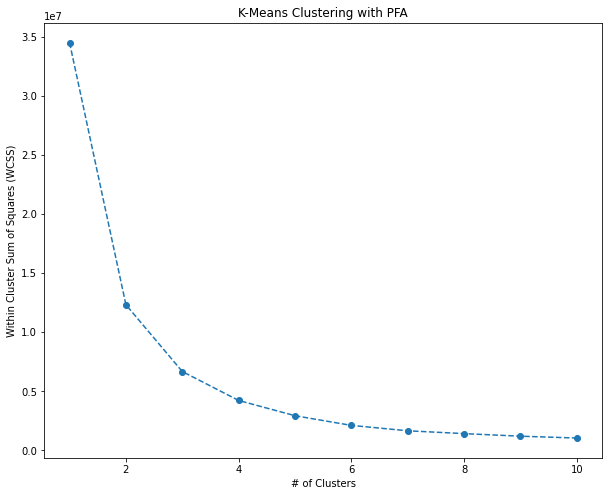

In [256]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,11), wcss_pfa, marker='o', linestyle='--')
plt.title("K-Means Clustering with PFA")
plt.xlabel("# of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.show()

In [258]:
kmeans_pfa = KMeans(n_clusters = 5, init = 'k-means++', random_state = 12)


kmeans_pfa.fit_predict(pfa_kmeans_data)

sscore = silhouette_score(pfa_kmeans_data, kmeans_pfa.labels_)
print('Silhouette Score: %.5f' % sscore)

Silhouette Score: 0.48136


In [259]:
agg_5y_data_pfa_kmeans = pd.concat([pfa_kmeans_data.reset_index(drop=True), pd.DataFrame(scores_pfa)], axis=1)
agg_5y_data_pfa_kmeans.columns.values[-10:] = ['xg_plus_minus score', 'touches_live_ball score', 'through_balls score', 'interceptions score', 'shots_blocked score', 'sca_shots score', 'sca_passes_live score', 'progressive_passes_received score', 'passes_progressive_distance score', 'passes_pct_short score']
agg_5y_data_pfa_kmeans['Segment K-Means PFA'] = kmeans_pfa.labels_

agg_5y_data_pfa_kmeans['player'] = agg_5y['player']
agg_5y_data_pfa_kmeans = agg_5y_data_pfa_kmeans.set_index('player', drop=True)
agg_5y_data_pfa_kmeans.head()

xg_plus_minus  touches_live_ball  through_balls  \
player                                                                  
Mehdi Abeid, 2019          0.000000          60.281760       0.177954   
Amir Abrashi, 2019        -0.068354          52.518987       0.000000   
Afriyie Acquah, 2019       0.810596          53.701987       0.119205   
Tyler Adams, 2019         -0.848821          80.013870       0.499307   
Aday, 2019                -0.111628          53.023256       0.000000   

                      interceptions  shots_blocked  sca_shots  \
player                                                          
Mehdi Abeid, 2019          1.290163       0.311419   0.044488   
Amir Abrashi, 2019         1.594937       0.341772   0.000000   
Afriyie Acquah, 2019       0.715232       0.059603   0.238411   
Tyler Adams, 2019          1.997226       0.124827   0.000000   
Aday, 2019                 0.976744       0.000000   0.279070   

                      sca_passes_live  progressive_passes_received  \
player                                                               
Mehdi Abeid, 2019            1.334652                     2.224419   
Amir Abrashi, 2019           0.911392                     1.025316   
Afriyie Acquah, 2019         2.026490                     4.529801   
Tyler Adams, 2019            1.248266                     1.497920   
Aday, 2019                   2.511628                     5.581395   

                      passes_progressive_distance  passes_pct_short  ...  \
player                                                               ...   
Mehdi Abeid, 2019                      165.719229          3.999506  ...   
Amir Abrashi, 2019                     126.227848         10.082278  ...   
Afriyie Acquah, 2019                   136.490066          5.358278  ...   
Tyler Adams, 2019                      266.005548         10.423024  ...   
Aday, 2019                             193.395349         12.516279  ...   

                      touches_live_ball score  through_balls score  \
player                                                               
Mehdi Abeid, 2019                    0.541798            -0.398030   
Amir Abrashi, 2019                   1.247720            -0.709981   
Afriyie Acquah, 2019                -0.500546             0.515861   
Tyler Adams, 2019                    0.411755            -0.925981   
Aday, 2019                          -0.348649             0.122834   

                      interceptions score  shots_blocked score  \
player                                                           
Mehdi Abeid, 2019               -0.791905            -0.089884   
Amir Abrashi, 2019              -1.261255            -0.382424   
Afriyie Acquah, 2019             0.419838             0.014460   
Tyler Adams, 2019               -1.327646            -0.204859   
Aday, 2019                       0.642917             0.050210   

                      sca_shots score  sca_passes_live score  \
player                                                         
Mehdi Abeid, 2019           -0.231879               0.421713   
Amir Abrashi, 2019          -0.486157               0.342922   
Afriyie Acquah, 2019        -0.041125              -0.213462   
Tyler Adams, 2019            0.350381               0.421424   
Aday, 2019                   0.102246              -0.489735   

                      progressive_passes_received score  \
player                                                    
Mehdi Abeid, 2019                              0.076427   
Amir Abrashi, 2019                             0.807386   
Afriyie Acquah, 2019                          -0.497705   
Tyler Adams, 2019                              0.463827   
Aday, 2019                                     0.102031   

                      passes_progressive_distance score  \
player                                                    
Mehdi Abeid, 2019                             -0.236002   
Amir Abrashi, 2019                  

### Preliminary Data Visualization

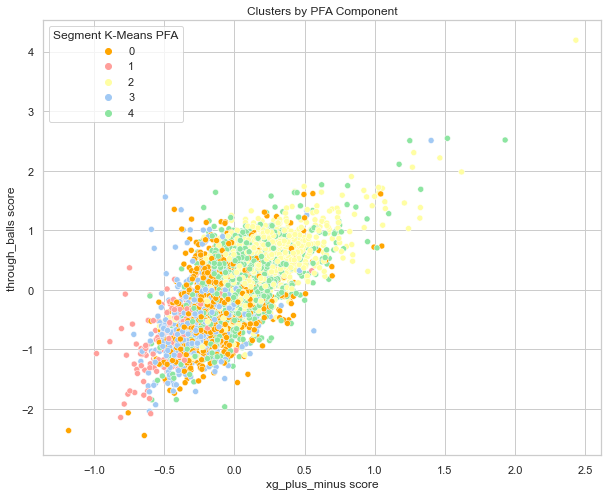

In [278]:
y0 = agg_5y_data_pfa_kmeans.iloc[:,-11]
y1 = agg_5y_data_pfa_kmeans.iloc[:,-10]
y2 = agg_5y_data_pfa_kmeans.iloc[:,-9]
y3 = agg_5y_data_pfa_kmeans.iloc[:,-8]
y4 = agg_5y_data_pfa_kmeans.iloc[:,-7]
y5 = agg_5y_data_pfa_kmeans.iloc[:,-6]
y6 = agg_5y_data_pfa_kmeans.iloc[:,-5]
y7 = agg_5y_data_pfa_kmeans.iloc[:,-4]
y8 = agg_5y_data_pfa_kmeans.iloc[:,-3]
y9 = agg_5y_data_pfa_kmeans.iloc[:,-2]

plt.figure(figsize=(10, 8))
sns.scatterplot(y0, y2, hue = agg_5y_data_pfa_kmeans['Segment K-Means PFA'], palette=['orange', 'r', 'y', 'b', 'g'])
plt.title("Clusters by PFA Component")
plt.show()

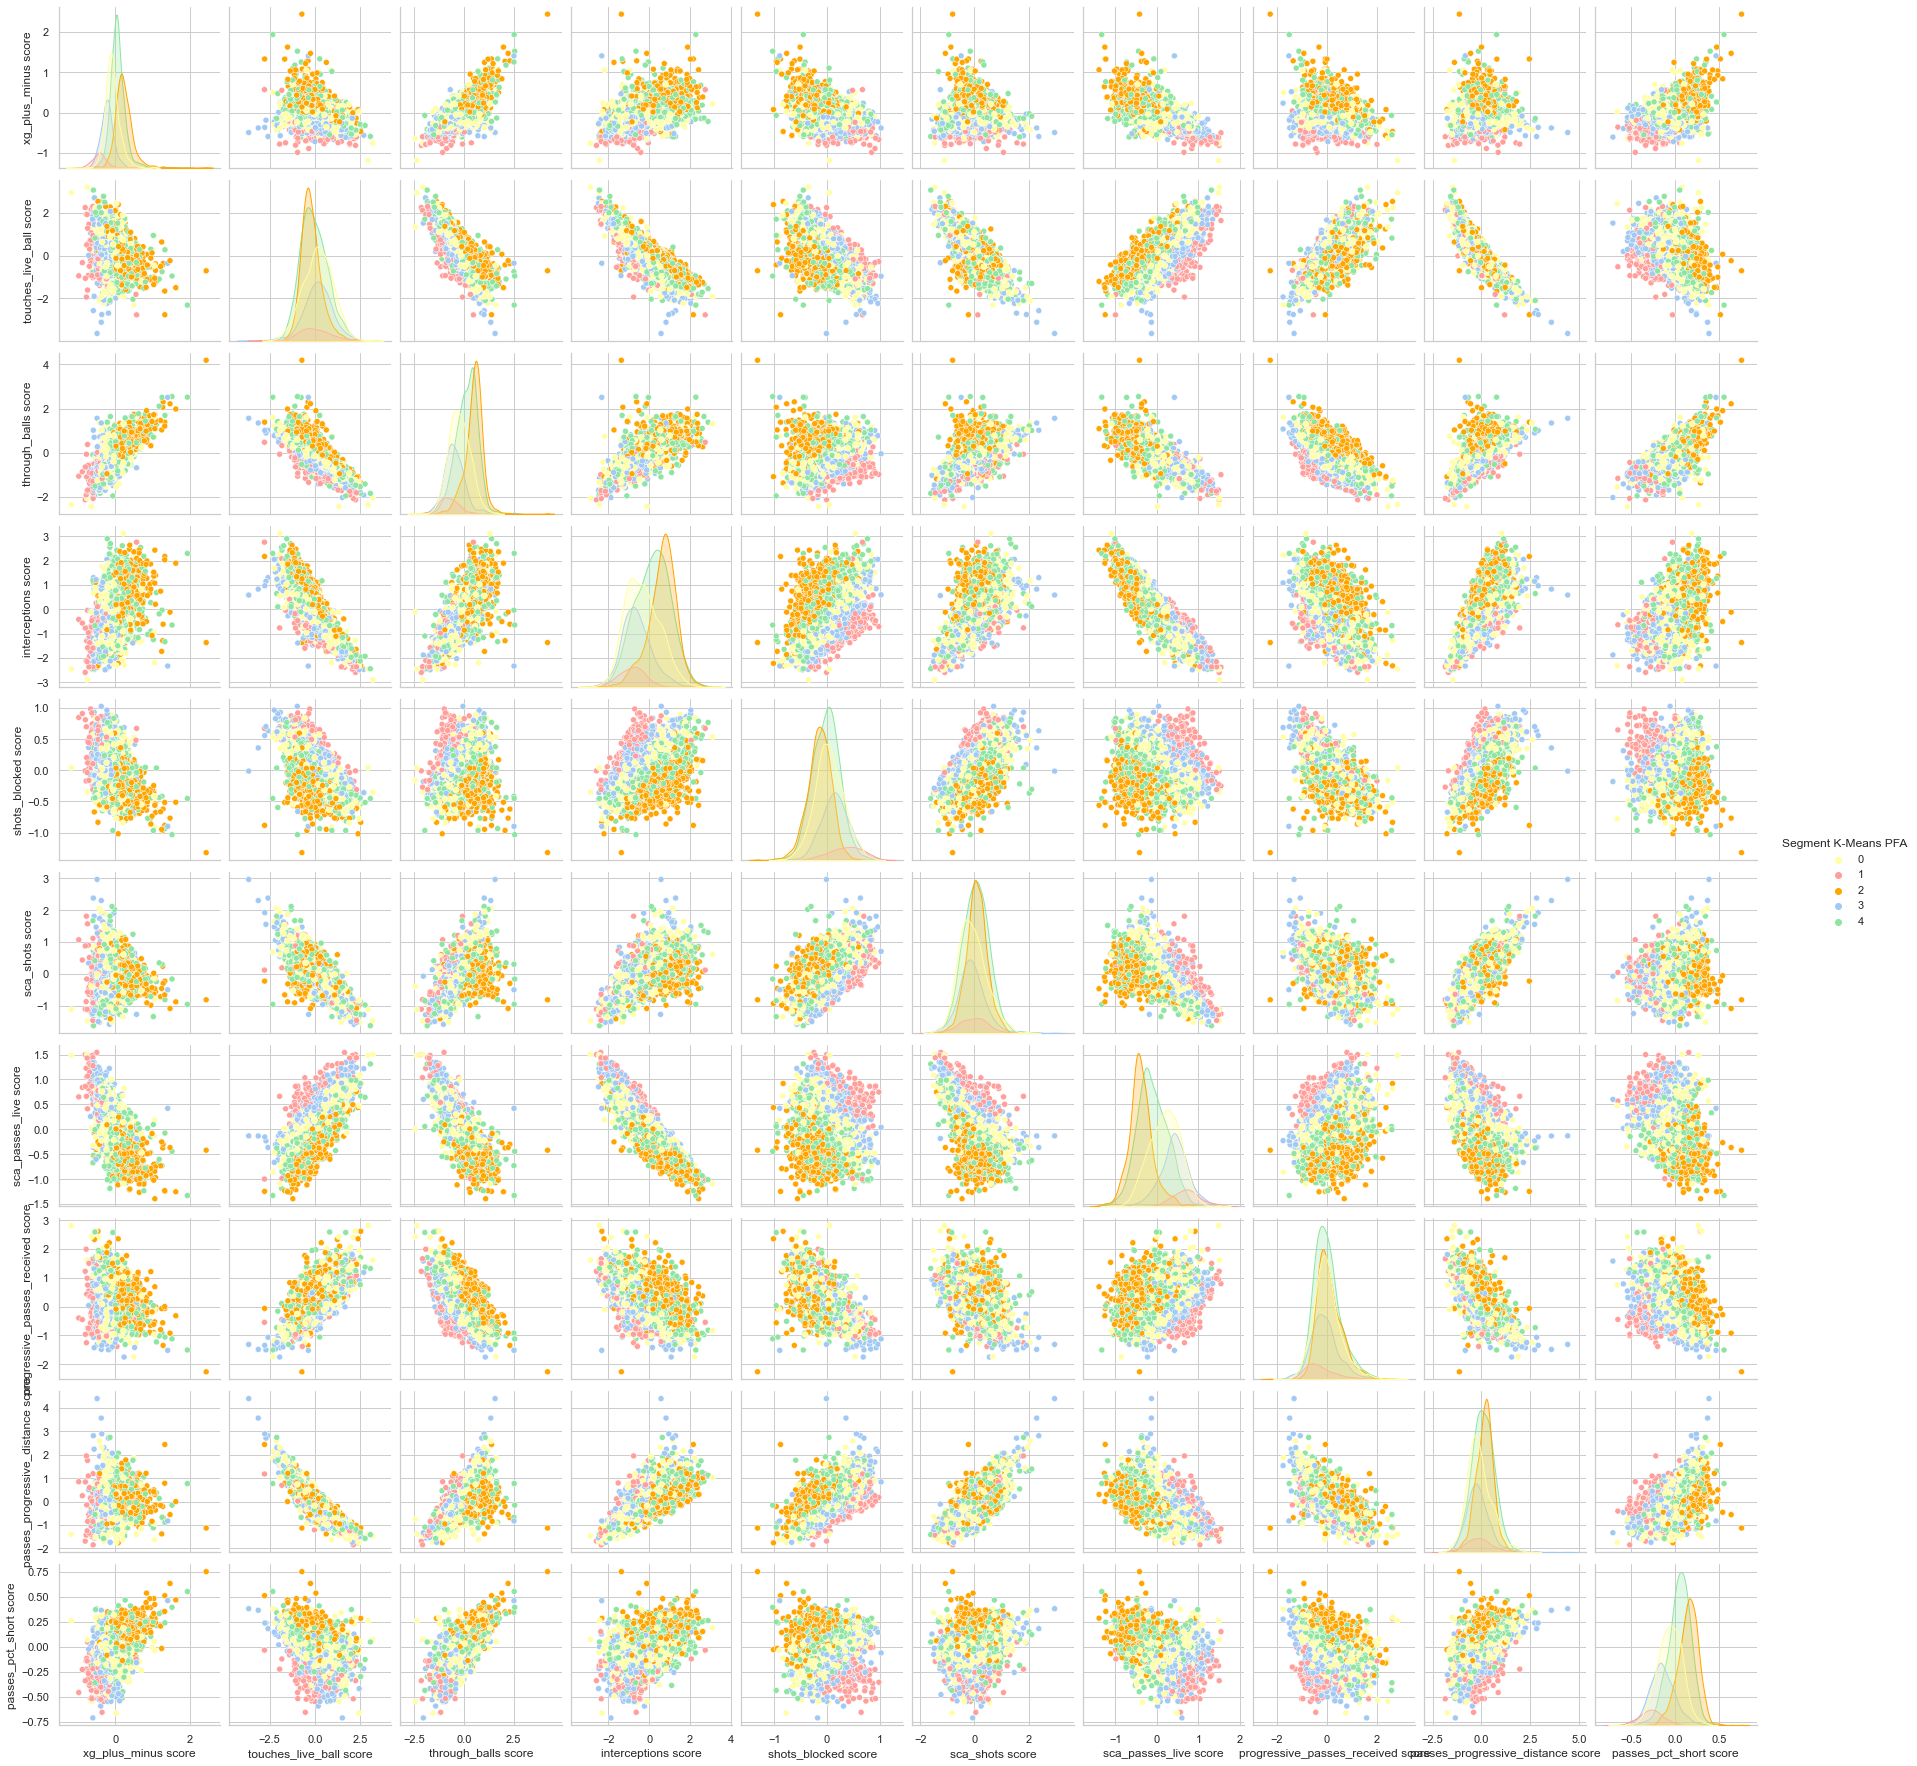

In [279]:
pairplot_data = agg_5y_data_pfa_kmeans.iloc[:, -11:].reset_index(drop=True)
sns.pairplot(pairplot_data, hue='Segment K-Means PFA', palette=['y', 'r', 'orange', 'b', 'g'])

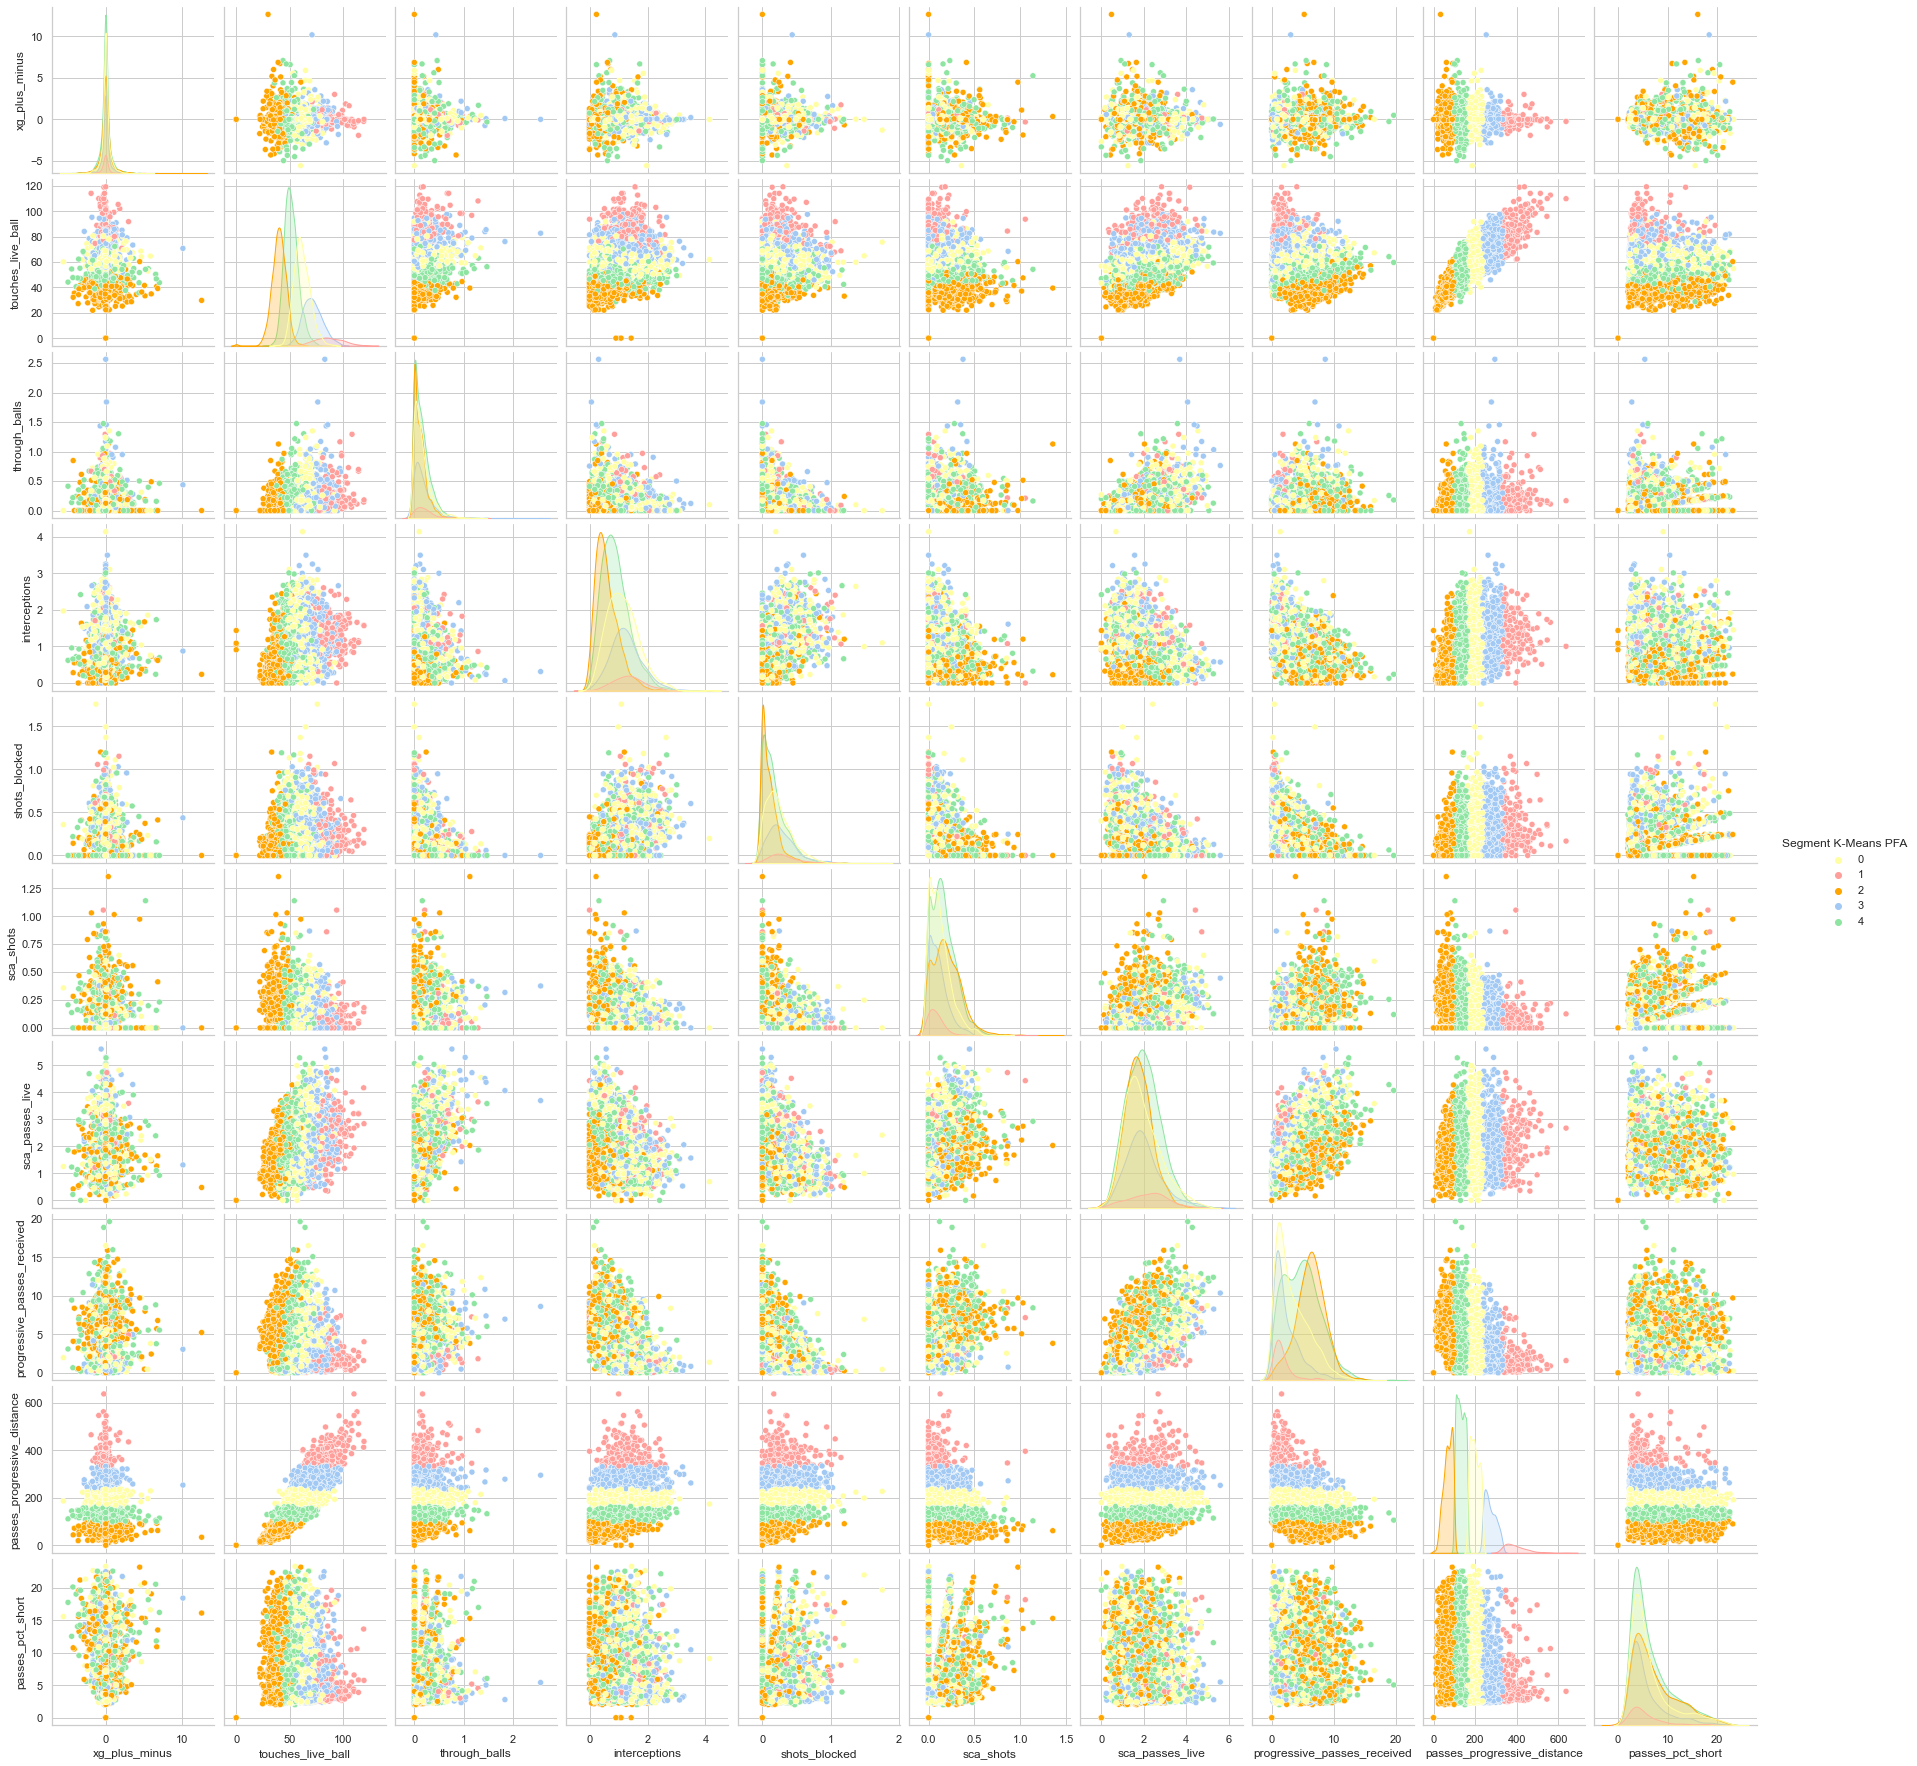

In [280]:
unnorm_pairplot_data = agg_5y_data_pfa_kmeans[['xg_plus_minus', 'touches_live_ball', 'through_balls', 'interceptions', 'shots_blocked', 'sca_shots', 'sca_passes_live', 'progressive_passes_received', 'passes_progressive_distance', 'passes_pct_short', 'Segment K-Means PFA']].reset_index(drop=True)
sns.pairplot(unnorm_pairplot_data, hue='Segment K-Means PFA', palette=['y', 'r', 'orange', 'b', 'g'])

In [250]:
final_data = agg_5y_data_pfa_kmeans[['xg_plus_minus', 'touches_live_ball', 'through_balls', 'interceptions', 'shots_blocked', 'sca_shots', 'sca_passes_live', 'progressive_passes_received', 'passes_progressive_distance', 'passes_pct_short', 'xg_plus_minus score', 'touches_live_ball score', 'through_balls score', 'interceptions score', 'shots_blocked score', 'sca_shots score', 'sca_passes_live score', 'progressive_passes_received score', 'passes_progressive_distance score', 'passes_pct_short score', 'Segment K-Means PFA']]
final_data.head()

xg_plus_minus  touches_live_ball  through_balls  \
player                                                                  
Mehdi Abeid, 2019          0.000000          60.281760       0.177954   
Amir Abrashi, 2019        -0.068354          52.518987       0.000000   
Afriyie Acquah, 2019       0.810596          53.701987       0.119205   
Tyler Adams, 2019         -0.848821          80.013870       0.499307   
Aday, 2019                -0.111628          53.023256       0.000000   

                      interceptions  shots_blocked  sca_shots  \
player                                                          
Mehdi Abeid, 2019          1.290163       0.311419   0.044488   
Amir Abrashi, 2019         1.594937       0.341772   0.000000   
Afriyie Acquah, 2019       0.715232       0.059603   0.238411   
Tyler Adams, 2019          1.997226       0.124827   0.000000   
Aday, 2019                 0.976744       0.000000   0.279070   

                      sca_passes_live  progressive_passes_received  \
player                                                               
Mehdi Abeid, 2019            1.334652                     2.224419   
Amir Abrashi, 2019           0.911392                     1.025316   
Afriyie Acquah, 2019         2.026490                     4.529801   
Tyler Adams, 2019            1.248266                     1.497920   
Aday, 2019                   2.511628                     5.581395   

                      passes_progressive_distance  passes_pct_short  ...  \
player                                                               ...   
Mehdi Abeid, 2019                      165.719229          3.999506  ...   
Amir Abrashi, 2019                     126.227848         10.082278  ...   
Afriyie Acquah, 2019                   136.490066          5.358278  ...   
Tyler Adams, 2019                      266.005548         10.423024  ...   
Aday, 2019                             193.395349         12.516279  ...   

                      touches_live_ball score  through_balls score  \
player                                                               
Mehdi Abeid, 2019                    0.008861            -0.009407   
Amir Abrashi, 2019                   0.013489            -0.011993   
Afriyie Acquah, 2019                -0.005056             0.005674   
Tyler Adams, 2019                    0.016238            -0.019583   
Aday, 2019                          -0.006232             0.006845   

                      interceptions score  shots_blocked score  \
player                                                           
Mehdi Abeid, 2019               -0.019138             0.000186   
Amir Abrashi, 2019              -0.025545            -0.001258   
Afriyie Acquah, 2019             0.010710            -0.000167   
Tyler Adams, 2019               -0.038014             0.001512   
Aday, 2019                       0.014016            -0.000333   

                      sca_shots score  sca_passes_live score  \
player                                                         
Mehdi Abeid, 2019           -0.002729               0.012866   
Amir Abrashi, 2019          -0.004839               0.016104   
Afriyie Acquah, 2019         0.001275              -0.007181   
Tyler Adams, 2019           -0.003266               0.025927   
Aday, 2019                   0.001948              -0.009627   

                      progressive_passes_received score  \
player                                                    
Mehdi Abeid, 2019                              0.002889   
Amir Abrashi, 2019                             0.006487   
Afriyie Acquah, 2019                          -0.002126   
Tyler Adams, 2019                              0.004930   
Aday, 2019                                    -0.001536   

                      passes_progressive_distance score  \
player                                                    
Mehdi Abeid, 2019                             -0.007237   
Amir Abrashi, 2019                  

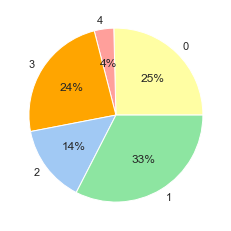

In [281]:
segment_counts = []
for i in range(0, 5):
    segment_counts.append(len(final_data[final_data['Segment K-Means PFA'] == i]))

plt.pie(segment_counts, labels=final_data['Segment K-Means PFA'].unique(), colors=['y', 'r', 'orange', 'b', 'g'], autopct='%.0f%%')
  
# displaying chart
plt.show()

### Preparing for Tableau Dashboard Analysis

In [294]:
final_data['year'] = agg_5y['player'].str[-4:].to_list()

In [295]:
final_data['league'] = agg_5y['league'].to_list()

In [299]:
agg_mins = pd.read_csv("output_tables/5y_aggregate_data.csv")
final_data['minutes'] = agg_mins['minutes'].to_list()

In [301]:
final_data.to_csv('output_tables/final_results.csv')

In [300]:
final_data

xg_plus_minus  touches_live_ball  through_balls  \
player                                                                    
Mehdi Abeid, 2019            0.000000          60.281760       0.177954   
Amir Abrashi, 2019          -0.068354          52.518987       0.000000   
Afriyie Acquah, 2019         0.810596          53.701987       0.119205   
Tyler Adams, 2019           -0.848821          80.013870       0.499307   
Aday, 2019                  -0.111628          53.023256       0.000000   
...                               ...                ...            ...   
Hakim Ziyech, 2023          -0.013616          68.759455       0.544629   
Martín Zubimendi, 2023       0.000000          60.657852       0.174137   
Szymon Żurkowski, 2023      -2.096471          35.788235       0.000000   
Martin Ødegaard, 2023        0.115126          60.441318       0.661976   
Filip Đuričić, 2023          0.000000          41.142857       0.124424   

                        interceptions  shots_blocked  sca_shots  \
player                                                            
Mehdi Abeid, 2019            1.290163       0.311419   0.044488   
Amir Abrashi, 2019           1.594937       0.341772   0.000000   
Afriyie Acquah, 2019         0.715232       0.059603   0.238411   
Tyler Adams, 2019            1.997226       0.124827   0.000000   
Aday, 2019                   0.976744       0.000000   0.279070   
...                               ...            ...        ...   
Hakim Ziyech, 2023           0.680787       0.000000   0.000000   
Martín Zubimendi, 2023       1.073847       0.493389   0.029023   
Szymon Żurkowski, 2023       0.847059       0.423529   0.000000   
Martin Ødegaard, 2023        0.172689       0.143908   0.345379   
Filip Đuričić, 2023          0.290323       0.248848   0.124424   

                        sca_passes_live  progressive_passes_received  \
player                                                                 
Mehdi Abeid, 2019              1.334652                     2.224419   
Amir Abrashi, 2019             0.911392                     1.025316   
Afriyie Acquah, 2019           2.026490                     4.529801   
Tyler Adams, 2019              1.248266                     1.497920   
Aday, 2019                     2.511628                     5.581395   
...                                 ...                          ...   
Hakim Ziyech, 2023             3.403933                     9.394856   
Martín Zubimendi, 2023         1.364076                     0.841664   
Szymon Żurkowski, 2023         0.211765                     2.117647   
Martin Ødegaard, 2023          3.540134                     5.554845   
Filip Đuričić, 2023            1.866359                     3.442396   

                        passes_progressive_distance  passes_pct_short  ...  \
player                                                                 ...   
Mehdi Abeid, 2019                        165.719229          3.999506  ...   
Amir Abrashi, 2019                       126.227848         10.082278  ...   
Afriyie Acquah, 2019                     136.490066          5.358278  ...   
Tyler Adams, 2019                        266.005548         10.423024  ...   
Aday, 2019                               193.395349         12.516279  ...   
...                                             ...               ...  ...   
Hakim Ziyech, 2023                       213.767020         11.927383  ...   
Martín Zubimendi, 2023                   234.853273          2.562722  ...   
Szymon Żurkowski, 2023                    57.811765         16.327059  ...   
Martin Ødegaard, 2023                    173.092421          2.501119  ...   
Filip Đuričić, 2023                       89.958525          3.608295  ...   

                        shots_blocked score  sca_shots score  \
player                                                         
Mehdi Abeid, 2019                  0.000186        -0.002729   
Amir Abrashi, 2019              